# GRIP @ The Sparks Foundation

## Author :Jatoth Raj Kumar

### Task 2 : Prediction using Unsupervised Machine Learning

Task:From the given ‘Iris’ dataset,We have predict the optimum number of clusters
and represent it visually.

### importing required libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1 - Loading the dataset

In [32]:
df = pd.read_csv('C:\\Users\hp\\Downloads\\iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.shape

(150, 6)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
df.drop("Id",axis=1 ,inplace=True)

In [37]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2 - Visualizing the data & Outliers

In [38]:
import seaborn as sns

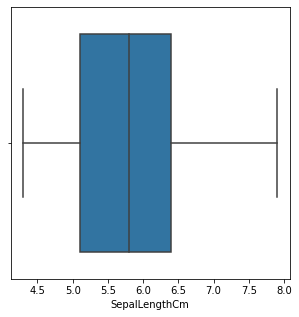

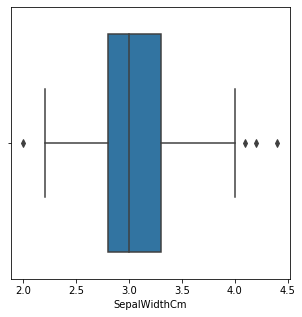

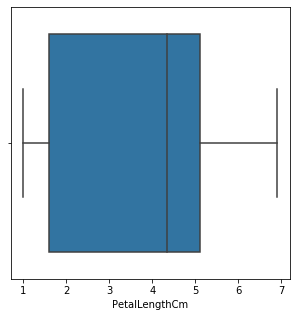

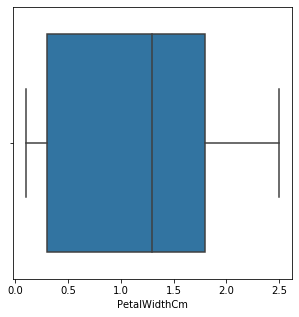

In [39]:
for column in df.columns:
    if df[column].dtype!='object':
        plt.figure(figsize=(5,5))
        sns.boxplot(df[column])
        plt.show()

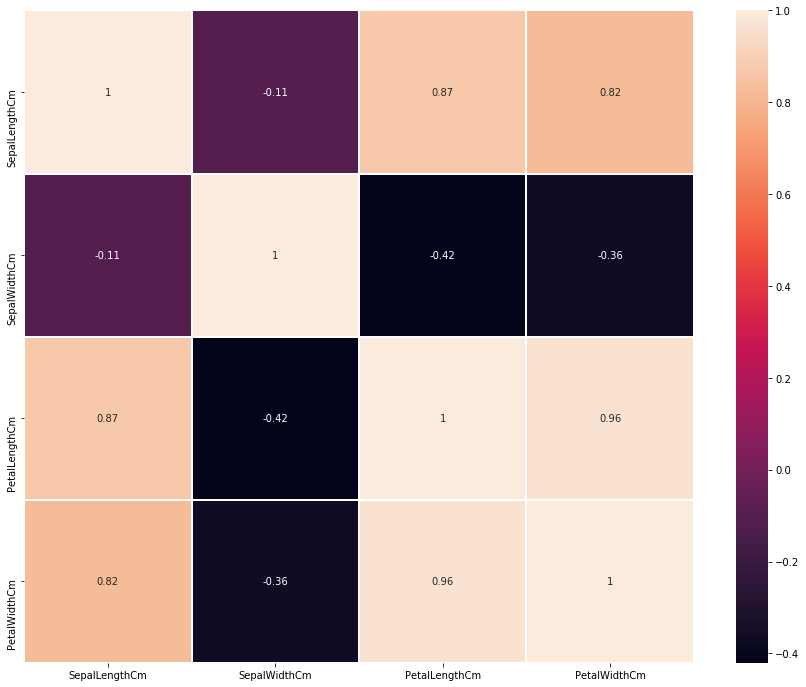

In [40]:
fig=plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),linewidths=1,annot=True)

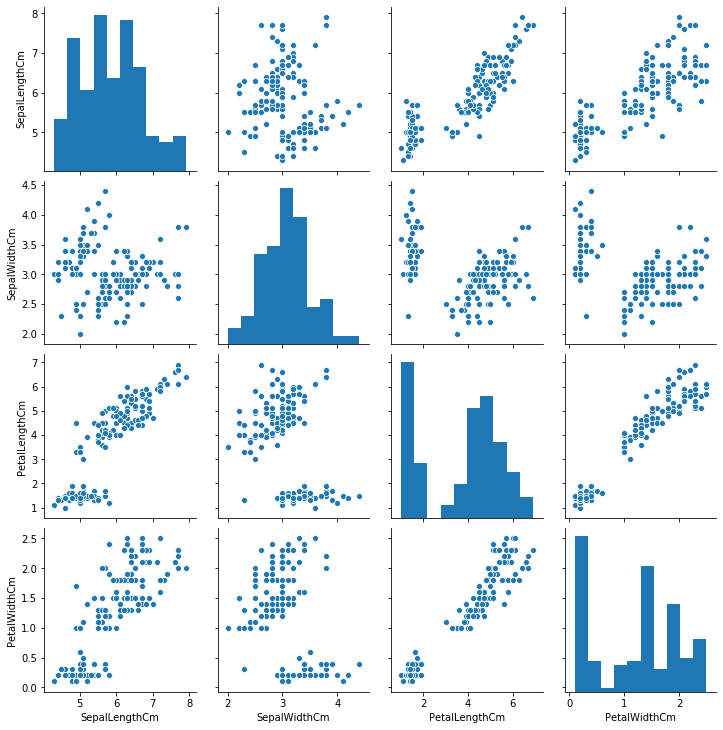

In [41]:
sns.pairplot(df)

In [42]:
df['SepalWidthCm'].shape

(150,)

### 3 - Finding the optimum number of clusters

Elbow Method is used to get optimum number of clusters.

In [43]:
from sklearn.cluster import KMeans

In [44]:
sse=[]
k_range=range(1,10)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

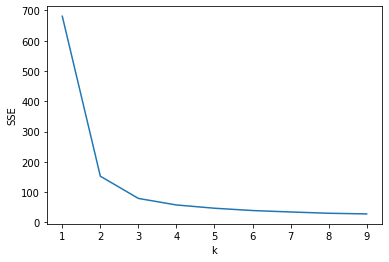

In [45]:
plt.xlabel("k")
plt.ylabel('SSE')
plt.plot(k_range,sse)

from the above graph we can say that the optimum number of clusters are 3.

In [46]:
x=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values

### 4 - Applying K-means++

In [47]:
km= KMeans(n_clusters = 3)
y_pred = km.fit_predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### 5 - Visualizing the clusters

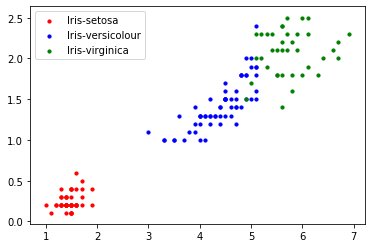

In [48]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3],s = 10, c = 'green', label = 'Iris-virginica')
plt.legend()

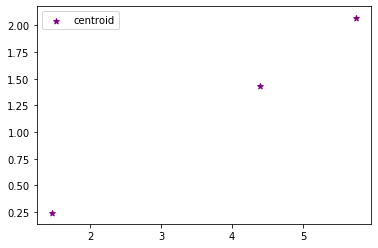

In [49]:
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='purple',marker='*',label='centroid')
plt.legend()

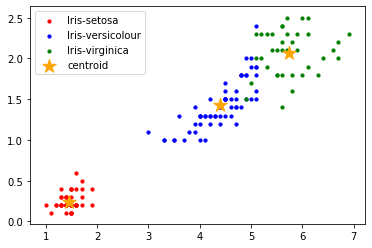

In [50]:
plt.scatter(x[y_pred == 0, 2], x[y_pred == 0, 3], s = 10, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_pred == 1, 2], x[y_pred == 1, 3], s = 10, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_pred == 2, 2], x[y_pred == 2, 3],s = 10, c = 'green', label = 'Iris-virginica')
plt.scatter(km.cluster_centers_[:,2],km.cluster_centers_[:,3],color='orange',s=200,marker='*',label='centroid')
plt.legend()

In [51]:
df['cluster'] = km.labels_
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [52]:
df['Species_encoded'] = df['Species'].apply(lambda x: 0 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [53]:
from sklearn.metrics import classification_report
print(classification_report(df['Species_encoded'],df['cluster']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.77      0.96      0.86        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Confusion Matrix

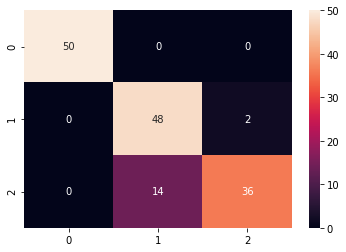

In [54]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(df['Species_encoded'],df['cluster']), annot=True)

## Conclusion

#### The optimum number of clusters are 3.

## THANK YOU